<small><font color=gray>Notebook authors: <a href="https://www.linkedin.com/in/olegmelnikov/" target="_blank">Oleg Melnikov</a>, Kiryll Bykov, Alexey Boldyrev ©2021 onwards</font></small><hr style="margin:0;background-color:silver">

**[<font size=6>📈Crypto</font>](https://www.kaggle.com/competitions/11mar24hse-crypto/rules)**. [**Instructions**](https://colab.research.google.com/drive/1owkYjuRGkx050LQnM3b3yTzd0Dr2XbeV) for running Colabs.

<small>**CONSENT.** <mark>[ X ]</mark> We consent to sharing our Colab (after the assignment ends) with other students/instructors for educational purposes.

In [ ]:
from google.colab import drive; drive.mount('/content/drive')   # OK to enable, if kaggle.json is stored in Google Drive

Mounted at /content/drive


In [ ]:
%%capture
pip install -U kaggle  # upgrade kaggle package (to avoid a warning)

In [ ]:
!mkdir -p ~/.kaggle                               # .kaggle folder must contain kaggle.json for kaggle executable to properly authenticate you to Kaggle.com
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json  # First, download kaggle.json from kaggle.com (in Account page) and place it in the root of mounted Google Drive
# !cp kaggle.json ~/.kaggle/kaggle.json           # Alternative location of kaggle.json (without a connection to Google Drive)
!chmod 600 ~/.kaggle/kaggle.json                  # give only the owner full read/write access to kaggle.json
!kaggle config set -n competition -v 11mar24hse-crypto # set the competition context for the next few kaggle API calls. !kaggle config view - shows current settings
!kaggle competitions download                     # download competition dataset as a zip file
!unzip -o *.zip                                   # Kaggle dataset is copied as a single file and needs to be unzipped.
!kaggle competitions leaderboard --show           # print public leaderboard

cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, i

See [more](https://nvidia.custhelp.com/app/answers/detail/a_id/3751/~/useful-nvidia-smi-queries) about NVIDIA GPU stats. Test your code in (free) Colab. It uses Tesla T4 or Tesla K80 GPU.

In [ ]:
!nvidia-smi --query-gpu=gpu_name,memory.total,memory.free,memory.used --format=csv

name, memory.total [MiB], memory.free [MiB], memory.used [MiB]
Tesla T4, 15360 MiB, 15101 MiB, 0 MiB


In [ ]:
%%time
%%capture
%reset -f
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all"
import numpy as np, pandas as pd, time, matplotlib.pyplot as plt, os
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)
ToCSV = lambda df, fname: df.round(2).to_csv(f'{fname}.csv', index_label='id') # rounds values to 2 decimals

class Timer():
  def __init__(self, lim:'RunTimeLimit'=60*5): self.t0, self.lim, _ = time.time(), lim, print(f'⏳ started. You have {lim} sec. Good luck!')
  def ShowTime(self):
    msg = f'Runtime is {time.time()-self.t0:.0f} sec'
    print(f'\033[91m\033[1m' + msg + f' > {self.lim} sec limit!!!\033[0m' if (time.time()-self.t0-1) > self.lim else msg)

np.set_printoptions(linewidth=100, precision=2, edgeitems=5, suppress=True)
pd.set_option('display.max_columns', 20, 'display.precision', 2, 'display.max_rows', 4)

CPU times: user 1.58 s, sys: 346 ms, total: 1.93 s
Wall time: 3.73 s


Your training data are 7 descriptive features for past 500K observations. See helpful [Tutorial to the G-Research Crypto Competition](https://www.kaggle.com/cstein06/tutorial-to-the-g-research-crypto-competition).

In [ ]:
tXY = pd.read_csv('/content/drive/MyDrive/tXY.csv', index_col='id'); tXY

,Count,Open,High,Low,Close,Volume,VWAP
id,,,,,,,
0,64,0.20,0.20,0.20,0.20,447,0.20
1,72,0.20,0.20,0.20,0.20,592,0.20
...,...,...,...,...,...,...,...
499998,1636,1.15,1.16,1.15,1.15,2615,1.15
499999,3228,1.13,1.14,1.12,1.13,3354,1.13


Your task is to forecast the closing price for all future time steps (index IDs below).

In [ ]:
pY = pd.read_csv('/content/drive/MyDrive/sampleSubmission.csv', index_col='id'); pY.T

id,500000,500001,500002,500003,500004,500005,500006,500007,500008,500009,...,524421,524422,524423,524424,524425,524426,524427,524428,524429,524430
Close,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tmr = Timer() # runtime limit (in seconds). Add all of your code after the timer

<font size=5>⏳</font> <strong><font color=orange size=5>Your Code, Documentation, Ideas and Timer Start Here...</font></strong>


**TODO. Explain your preprocessing:** i.e. feature engineering, subsampling, clustering, dimensionality reduction, etc.

**TODO. Explain your modeling approach:** ideas you tried and why you thought they would be helpful. Takeaway: how these decisions guided you in modeling.

This is your baseline DNN model. Remember to [seed all your experiments](https://pytorch.org/docs/stable/notes/randomness.html#reproducibility) for reproducibility.

taX.shape=(K,Nx,p)=(50, 20000, 7); taY=(K,Ny)=(50, 24431)


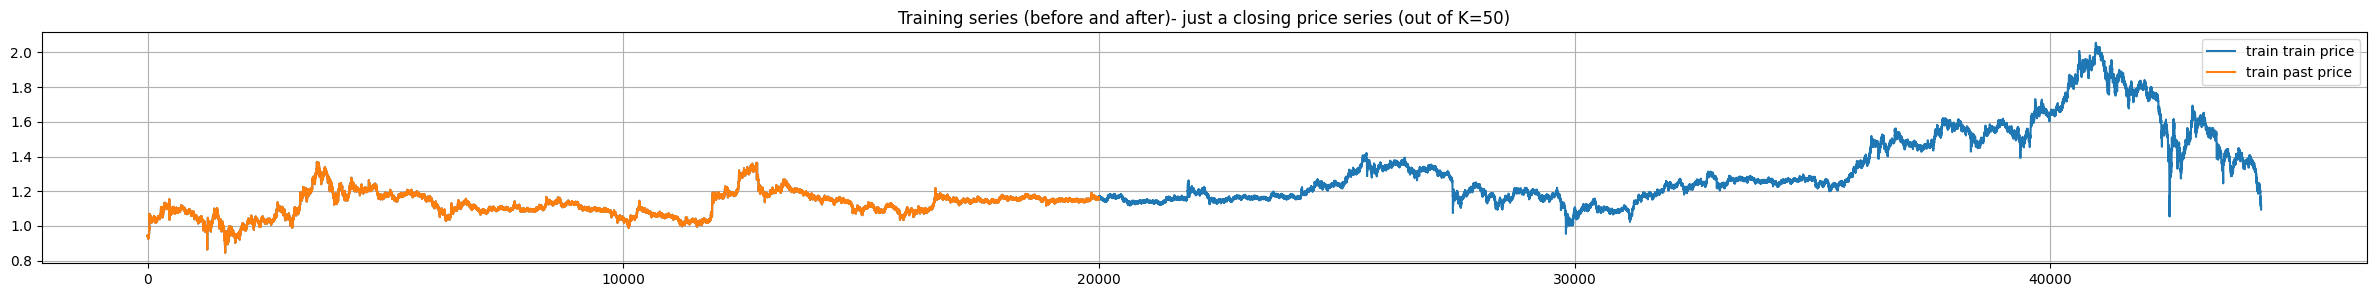

In [ ]:
K, (N, p), Nx, Ny = 50, tXY.shape, 20000, len(pY)  # samples, dataset dim, train set size, forecast set size
LtX, LtY = [], []
for i in range(N-Ny-K, N-Ny):                     # populate K samples with past X series and future Y series
  LtX.append(tXY.iloc[(i-Nx):i, :].values)        # X: historical 7Dim observations for Nx steps behind
  LtY.append(tXY.loc[i:(i+Ny-1),'Close'].values)  # Y: future closing prices for Ny steps ahead
taX, taY = np.array(LtX), np.array(LtY)           # training arrays past input X and future output Y
print(f'taX.shape=(K,Nx,p)={taX.shape}; taY=(K,Ny)={taY.shape}')  # convert to 3-tensors

df = pd.DataFrame(np.r_[taX[0,:,4], taY[0,:]], columns=['train train price'])
ax = df.plot(figsize=(30,3), title=f'Training series (before and after)- just a closing price series (out of K={K})');
pd.DataFrame(taX[0,:,4], columns=['train past price']).plot(grid=True, ax=ax);

Build an LSTM model with two hidden layers. It splits $K$ samples into batches with 7D series $X_{N_x\times p}$ as input and 1D series $Y_{N_y\times 1}$ as output.


In [ ]:
taX = torch.Tensor(taX)
taY = torch.Tensor(taY)

In [ ]:
ds = TensorDataset(taX, taY)

In [ ]:
dl = DataLoader(ds, batch_size=32)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class MyLSTMModel(nn.Module):
  def __init__(
      self,
      output_size,
      input_size,
      hidden_size=110,
      num_layers=2,
      bias=True,
      batch_first=True,
      dropout=0.2,

    ):
      super().__init__()

      self.lstm = nn.LSTM(input_size, hidden_size, dropout=dropout, num_layers=num_layers, batch_first=batch_first)
      self.dropout = nn.Dropout(dropout)
      self.linear = nn.LazyLinear(output_size)

  def forward(self, X):
      _, (last, _) = self.lstm(X)
      last = last[-1]
      last = self.dropout(last)
      last = self.linear(last)

      return last

In [ ]:
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)

m = MyLSTMModel(Ny, p)
m.to(device)

optim = torch.optim.Adam(m.parameters(), lr=0.01)
loss = nn.MSELoss()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


MyLSTMModel(
  (lstm): LSTM(7, 110, num_layers=2, batch_first=True, dropout=0.2)
  (dropout): Dropout(p=0.2, inplace=False)
  (linear): LazyLinear(in_features=0, out_features=24431, bias=True)
)

In [ ]:
%%time
n_epoch = 25
m.train()

for e in range(n_epoch):
  losses = []
  print(f"Epoch: {e}")

  for i, (X, Y) in enumerate(dl):
    X = X.to(device)
    Y = Y.to(device)
    optim.zero_grad()

    pred = m(X)

    l = loss(pred, Y)
    l.backward()
    optim.step()

    losses.append(l.detach().item())

  print(f"Avg epoh loss: {sum(losses) / len(losses)}")

Epoch: 0
Avg epoh loss: 1.7859631776809692
Epoch: 1
Avg epoh loss: 0.7879682034254074
Epoch: 2
Avg epoh loss: 0.22680067270994186
Epoch: 3
Avg epoh loss: 0.18079595267772675
Epoch: 4
Avg epoh loss: 0.048187730833888054
Epoch: 5
Avg epoh loss: 0.08333572745323181
Epoch: 6
Avg epoh loss: 0.08907115831971169
Epoch: 7
Avg epoh loss: 0.06506813317537308
Epoch: 8
Avg epoh loss: 0.03441793844103813
Epoch: 9
Avg epoh loss: 0.032827066257596016
Epoch: 10
Avg epoh loss: 0.04673049412667751
Epoch: 11
Avg epoh loss: 0.04241088032722473
Epoch: 12
Avg epoh loss: 0.03577706404030323
Epoch: 13
Avg epoh loss: 0.029988663271069527
Epoch: 14
Avg epoh loss: 0.038993606343865395
Epoch: 15
Avg epoh loss: 0.03448780067265034
Epoch: 16
Avg epoh loss: 0.035411459393799305
Epoch: 17
Avg epoh loss: 0.02874139230698347
Epoch: 18
Avg epoh loss: 0.03405052702873945
Epoch: 19
Avg epoh loss: 0.025827783159911633
Epoch: 20
Avg epoh loss: 0.025587696582078934
Epoch: 21
Avg epoh loss: 0.021672649774700403
Epoch: 22
Avg 

The plot below: the model memorized the prices from recent history (plus some local noise). Still you can use these predictions to visually (i.e. qualitatively) determine whether predictions are meaningful (i.e. have price-like shape) or just noise.

In [ ]:
m.eval();  # To disable dropout at evaluation stage

tX_recent.shape=(Nx,p)=(20000, 7)


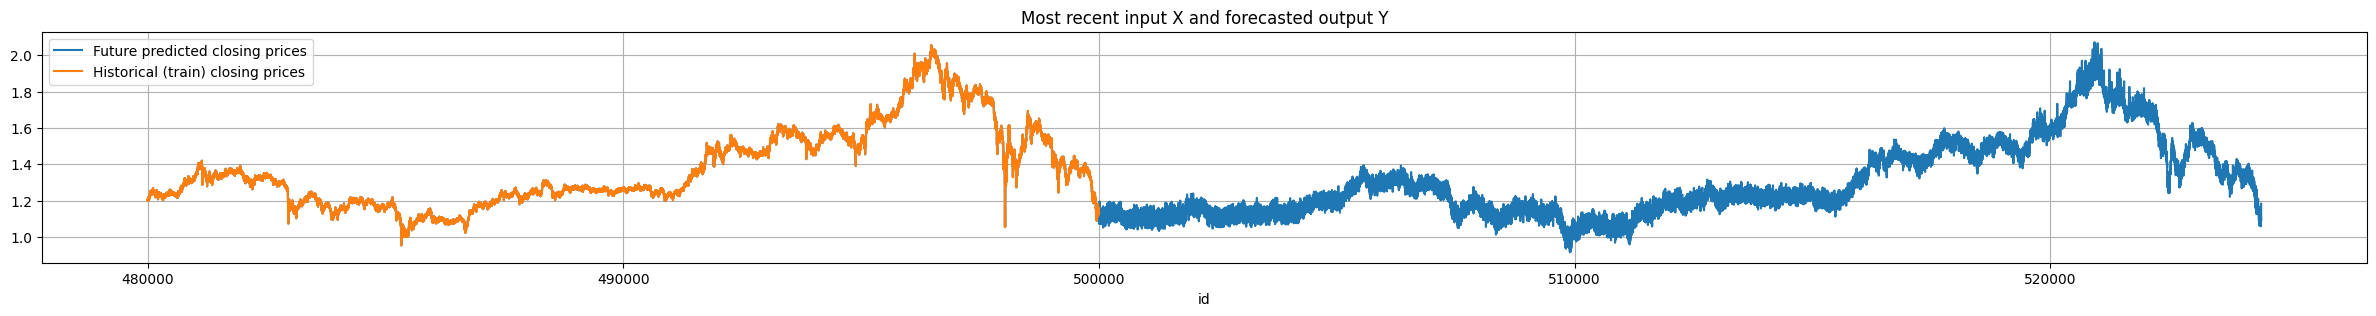

In [ ]:
tX_recent = tXY.iloc[-Nx:,:]  # most recent history of the coin
print(f'tX_recent.shape=(Nx,p)={tX_recent.shape}')
with torch.no_grad():
  pY['Close'] = m(torch.Tensor(tX_recent.values[np.newaxis,...]).to(device)).cpu().numpy().flatten()
ax = pd.concat([tX_recent.Close, pY.Close]).plot(figsize=(30,3), title='Most recent input X and forecasted output Y');
tX_recent.Close.plot(ax=ax, grid=True);
ax.legend(["Future predicted closing prices", "Historical (train) closing prices"]);

1. The model generates a baseline submission CSV file, see Colab folder (🗀 on the left).
1. You can download the generated CSV file and submit it to Kaggle.

In [ ]:
ToCSV(pY, 'Crypto-baseline')

# **References:**

FINAL DECISION:

After conducting a series of experiments and exploring various combinations of hyperparameters, we have made the decision to adjust two critical hyperparameters in our LSTM model. The changes were carefully evaluated based on their impact on model performance and generalization ability.

* Epochs (n_epoch): from  20 epochs to 25 epochs

Rationale: Increasing the number of epochs from 20 to 25 allowed the model additional iterations to learn from the dataset, improving the convergence rate without significant overfitting.

* Hidden Size (hidden_size):from 100 units to 110 units

* Rationale: The hidden layer size was increased from 100 to 110 units to enhance the model’s capacity to capture complex patterns in the data.

OUR ATTEMPTS :

We aimed to enhance our model's financial time series forecasting by implementing ideas which were provided in the end of collab.

At first we implemented the idea of shifting the target to predict returns (Return, LogReturn) to leverage their potentially more stationary nature.
Secondly we build new features including percentage changes, log differences, fractional changes, and squared prices to capture a broader spectrum of data patterns. ( we also tried various conbinations of this parameters )
Then we conducted several experiments with forecasting at longer intervals to assess performance over extended horizons.
The results and outcomes were the following:
Adding multiple new features increased the model's complexity, raising the risk of overfitting without necessarily improving prediction accuracy.
Also our model showed variable accuracy across different datasets, sometimes capturing trends but often diverging significantly from actual market movements.
A notable issue was the generation of negative prices when converting forecasted returns to price predictions.

The attempted feature enhancements and methodological shifts did not yield the expected improvements in forecasting accuracy. Moreover, the approach led to impractical outcomes like negative predicted prices, so we decided to steer clear from this modifications.

1. Remember to cite your sources here as well! At the least, your textbook should be cited. Google Scholar allows you to effortlessly copy/paste an APA citation format for books and publications. Also cite StackOverflow, package documentation, and other meaningful internet resources to help your peers learn from these (and to avoid plagiarism claims).

https://pytorch.org/docs/stable/data.html
https://youtube.com/playlist?list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&si=kHuJmAbxlPdp5LpG



<font size=5>⌛</font> <strong><font color=orange size=5>Do not exceed competition's runtime limit!</font></strong>

<hr color=red>


In [ ]:
tmr.ShowTime()    # measure Colab's runtime. Do not remove. Keep as the last cell in your notebook.

# 💡**Starter Ideas**

1. Try different RNN architectures and hyperparameters
1. Try [correlation loss/metric](https://duckduckgo.com/?q=correlation+loss+in+tensorflow&ia=web) (or equivalent)
1. Try longer/shorter history. FYI: GPU may not fit all observations, but you could lower the precision or simplify DNN
1. Try forecasting returns (differences or log differences at different lags) instead of actual values. Returns might appear "more" stationary (You'll need to compute forecasted prices from forecasted returns later)
1. Try new features: differences, fractions, powers of existing features, lagged features or lagged differences,..
1. Try a different time scale. Eg. forecasting every $k$ steps and then imputing interim values
1. Try technique in HOML pp.509-510
1. Try (programmatically) assigning higher/lower weights to history or historical events (such as extreme events)
1. Check [Kaggle G-Research Crypto Forecasting](https://www.kaggle.com/c/g-research-crypto-forecasting/code) competition for more suitable ideas.
1. Try further smoothing/averaging and forecasting values at sparser intervals
1. Try forecasting just the future trend